# COVID-19 data

A look at non-China and non-Iran COVID-19 data from here: https://outbreak.cc

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm

import seaborn as sns

sns.set(context="talk", style="darkgrid")
sns.set_palette(["#87ceeb", "#0c62c4", "#f3ae09", "#399f34", "#fd0607"])

My math is based on [this Hacker News comment][hn]:

> The general issue with this measure of mortality __(dead / (infected + dead))__ is that you're assuming that the infected won't die. In a disease that is exponentially growing, a better approximation of evaluating your survival chances is to look at the death to recovery rate __(dead / (recovered + dead))__. Based on the available data, we are closer to 7.8% than 2% mortality, which is closer to [the final mortality rate of SARS][wiki] of 9.6%.

[hn]: https://news.ycombinator.com/item?id=22433359

[wiki]: https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome

In [2]:
# Data from here: https://outbreak.cc
#
# Reddit doesn't like Iran's data, so I will exclude that too...

df = pd.DataFrame(
    [
        ["Singapore", 72, 0],
        ["Italy", 46, 21],
        ["Japan", 32, 5],
        ["Hong Kong", 30, 2],
        ["Thailand", 28, 0],
        ["South Korea", 24, 16],
        ["Malayasia", 20, 0],
        ["Vietnam", 16, 0],
        ["Germany", 16, 0],
        ["Australia", 15, 0],
        ["France", 11, 2],
        ["UK", 8, 0],
        ["USA", 7, 0],
        ["Macau", 6, 0],
        ["Taiwan", 5, 1],
        ["UAE", 5, 0],
        ["Canada", 3, 0],
        ["Spain", 2, 0],
    ],
    columns=["country", "recovered", "deaths"],
)

df["combined"] = df.recovered + df.deaths

df

,country,recovered,deaths,combined
0,Singapore,72,0,72
1,Italy,46,21,67
2,Japan,32,5,37
3,Hong Kong,30,2,32
4,Thailand,28,0,28
5,South Korea,24,16,40
6,Malayasia,20,0,20
7,Vietnam,16,0,16
8,Germany,16,0,16
9,Australia,15,0,15


In [3]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=2, beta=2)
    y = pm.Binomial("y", n=df.combined.values, p=p, observed=df.deaths.values)

    trace = pm.sample(draws=6000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 32000/32000 [00:05<00:00, 5828.84draws/s]


In [4]:
burn_in = 2000
trace = trace[burn_in:]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
p  0.123  0.016   0.093    0.154        0.0      0.0    6848.0  6848.0   

   ess_bulk  ess_tail  r_hat  
p    6823.0   11405.0    1.0  


/usr/local/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b751250>,
      dtype=object)

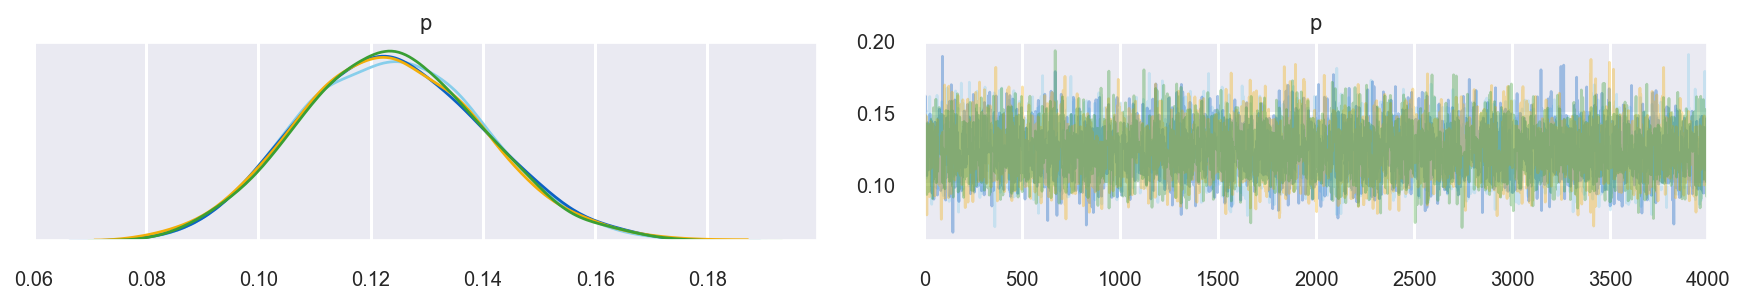

In [5]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c0ef790>],
      dtype=object)

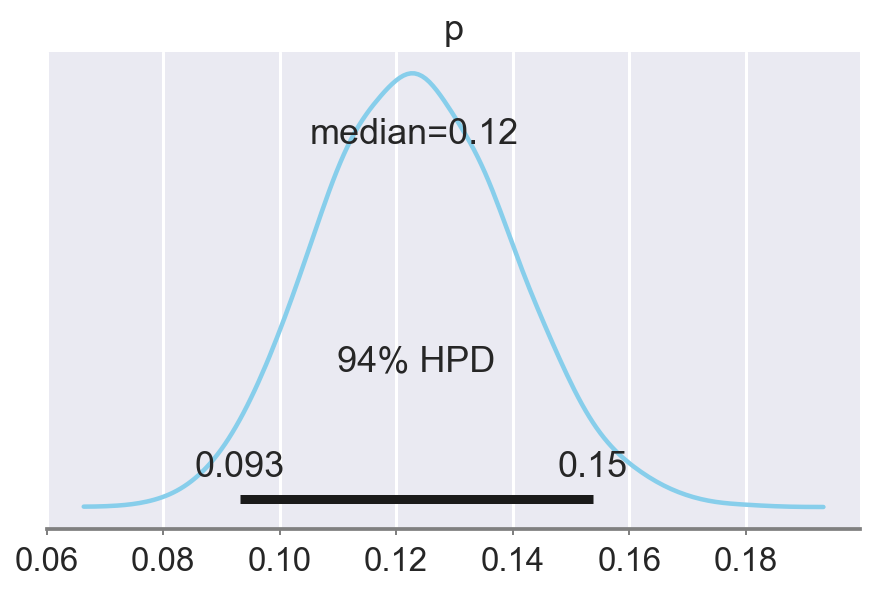

In [6]:
pm.plot_posterior(trace, point_estimate="median")

## death-to-recovery rate

     Median: 12%

__Note:__ Feel free to correct my code/math.

Also, feel free to note that __we're working with a small sample__.